In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
! pip install transformers
! pip install sentencepiece


[notice] A new release of pip available: 22.2.2 -> 23.3
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.2.2 -> 23.3
[notice] To update, run: pip install --upgrade pip


In [3]:
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
from PIL import Image

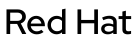

In [4]:
image_path = 'ocr-demo/test.png'
image = Image.open(image_path).convert("RGB")
image.show()

In [5]:
processor = TrOCRProcessor.from_pretrained('microsoft/trocr-base-printed')
model = VisionEncoderDecoderModel.from_pretrained('microsoft/trocr-base-printed')

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-printed and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [6]:
# pre-processing
pixel_values = processor(images=image, return_tensors="pt").pixel_values
# processing
generated_ids = model.generate(pixel_values)
# post-processing
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

In [7]:
print(generated_text)

RED HAT
